In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import XGBRegressor
%matplotlib inline

C:\Users\Rodrigo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
train = pd.read_csv('data/train_without_nan.csv', encoding='utf-8', sep=',')

test = pd.read_csv('data/test_without_nan.csv', encoding='utf-8', sep=',')

In [59]:
all_df = pd.concat((train, test), axis=0)

In [66]:
def plot_2(col):
    fig, axs = plt.subplots(ncols=2, figsize=(16, 7))
    sns.distplot(train[str(col)] , color="skyblue", ax=axs[0])
    sns.distplot(test[str(col)] , color="olive", ax=axs[1])
    
def plot_n_log10_log101(col):
    fig, axs = plt.subplots(ncols=3, figsize=(16, 7))
    sns.distplot(train[str(col)] , color="skyblue", ax=axs[0])
    sns.distplot(np.log10(train[str(col)]) , color="olive", ax=axs[1])
    sns.distplot(np.log1p(train[str(col)]) , color="olive", ax=axs[2])
    
def plot_n_log1p(col):
    fig, axs = plt.subplots(ncols=2, figsize=(16, 7))
    sns.distplot(train[str(col)] , color="skyblue", ax=axs[0])
    sns.distplot(np.log1p(train[str(col)]) , color="olive", ax=axs[1])

C:\Users\Rodrigo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


cant plot col LotFrontage


C:\Users\Rodrigo\Anaconda3\lib\site-packages\seaborn\distributions.py:36: RuntimeWarning: invalid value encountered in double_scalars
  return int(np.ceil((a.max() - a.min()) / h))
C:\Users\Rodrigo\Anaconda3\lib\site-packages\seaborn\utils.py:350: RuntimeWarning: invalid value encountered in double_scalars
  return q3 - q1


cant plot col MasVnrArea
cant plot col BsmtFinSF1
cant plot col BsmtFinSF2
cant plot col BsmtUnfSF
cant plot col TotalBsmtSF
cant plot col 2ndFlrSF
cant plot col LowQualFinSF
cant plot col BsmtFullBath
cant plot col BsmtHalfBath
cant plot col FullBath
cant plot col HalfBath
cant plot col BedroomAbvGr


C:\Users\Rodrigo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


cant plot col KitchenAbvGr
cant plot col Fireplaces


C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
C:\Users\Rodrigo\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\Rodrigo\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


cant plot col GarageYrBlt
cant plot col GarageCars
cant plot col GarageArea
cant plot col WoodDeckSF
cant plot col OpenPorchSF
cant plot col EnclosedPorch
cant plot col 3SsnPorch
cant plot col ScreenPorch
cant plot col PoolArea
cant plot col MiscVal


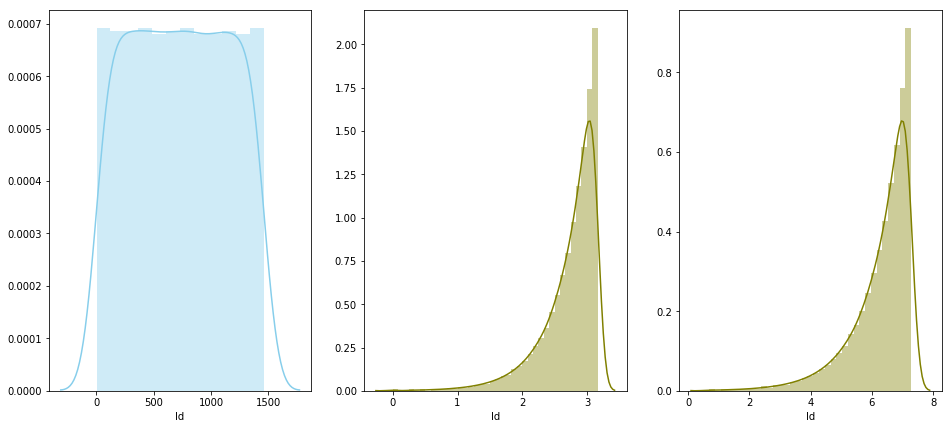

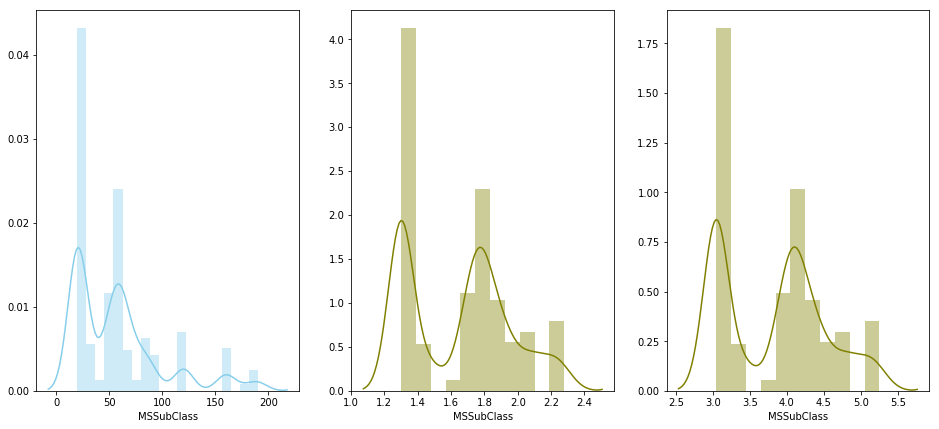

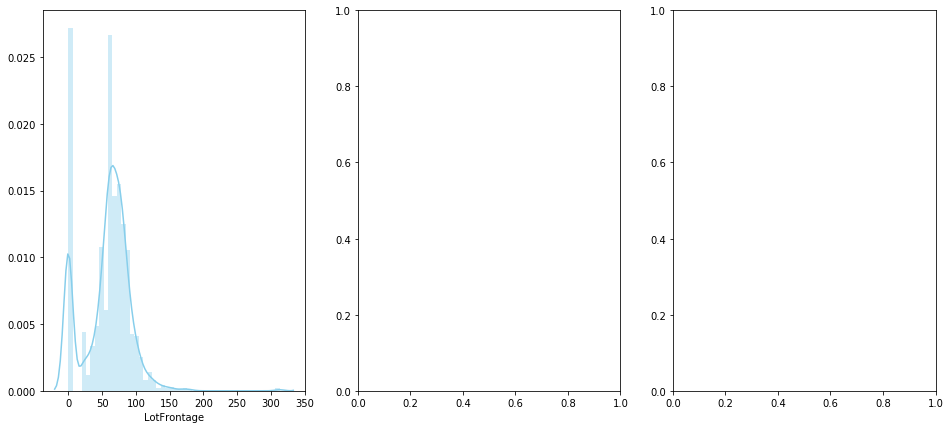

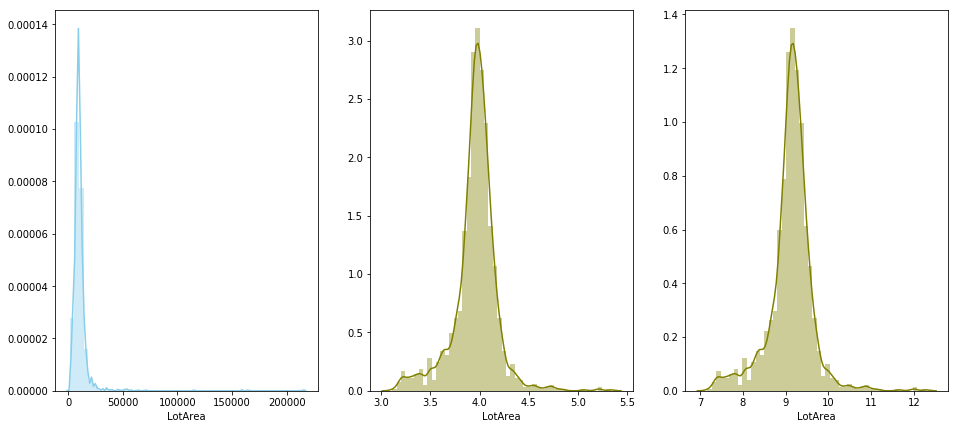

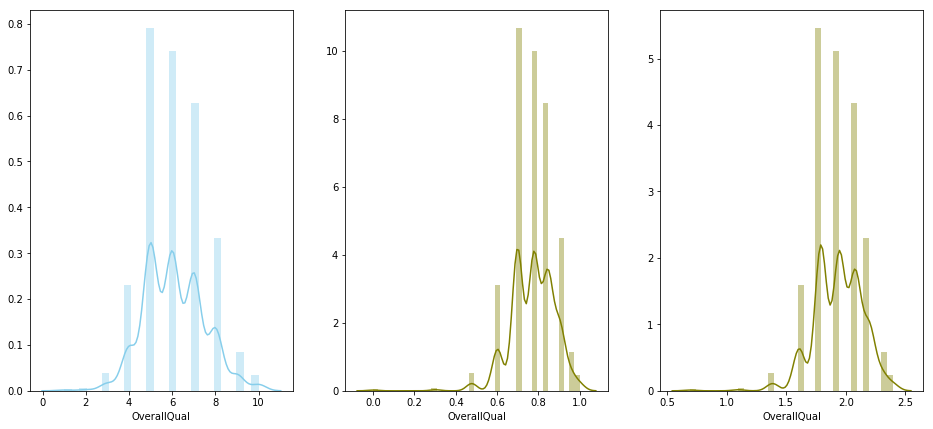

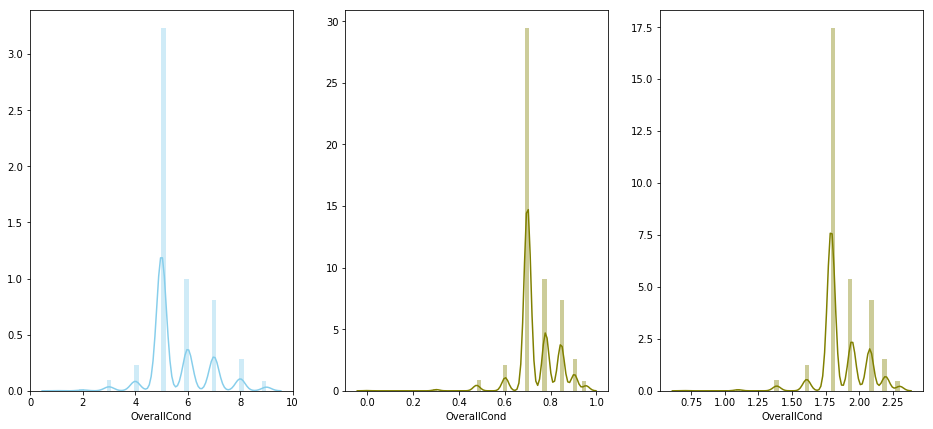

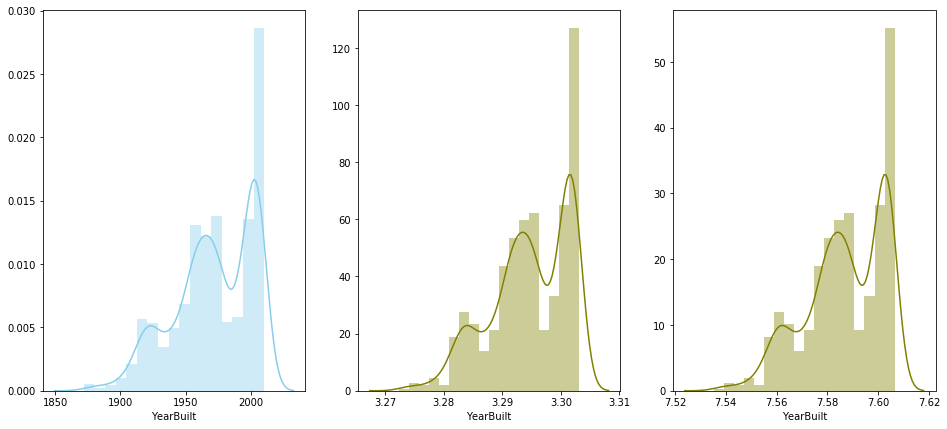

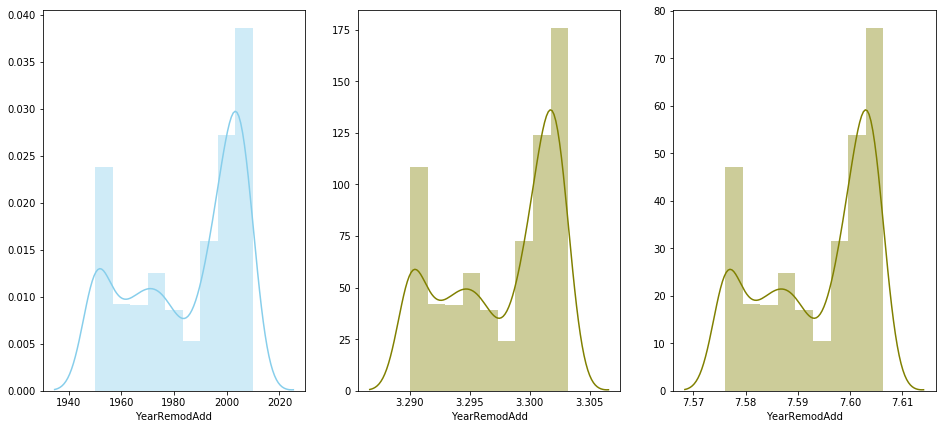

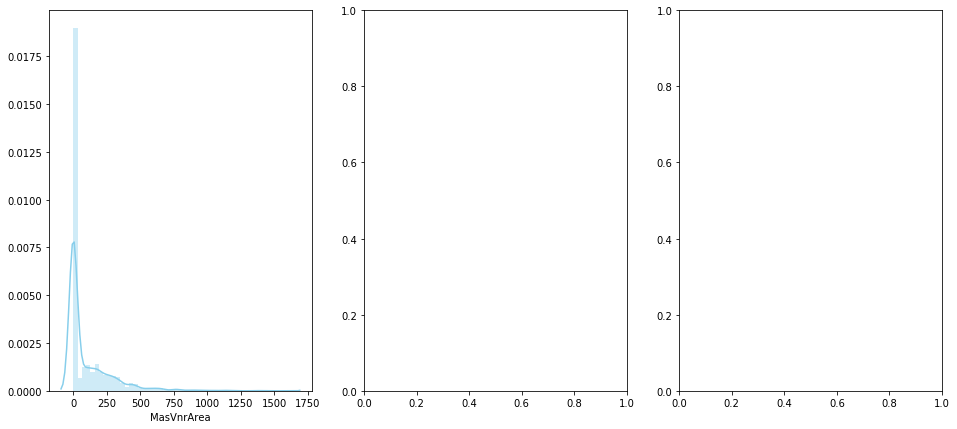

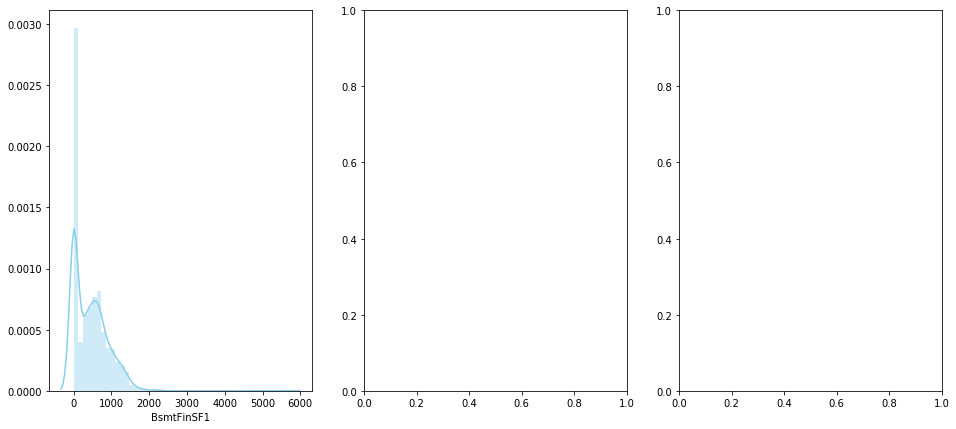

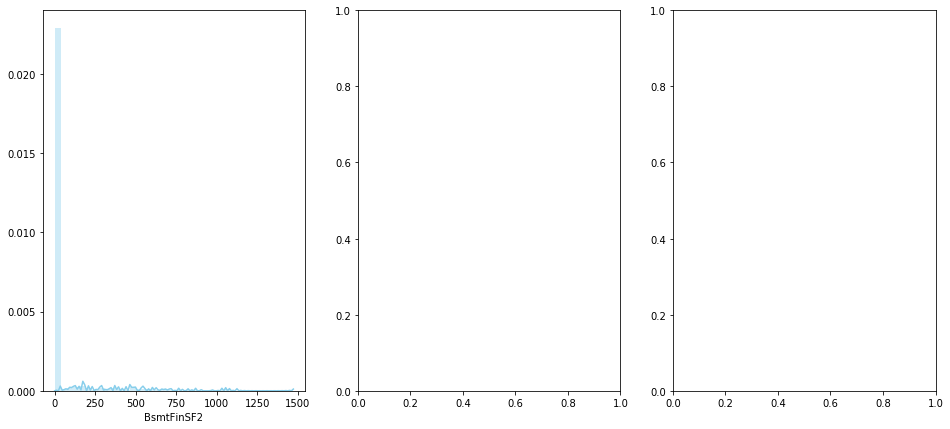

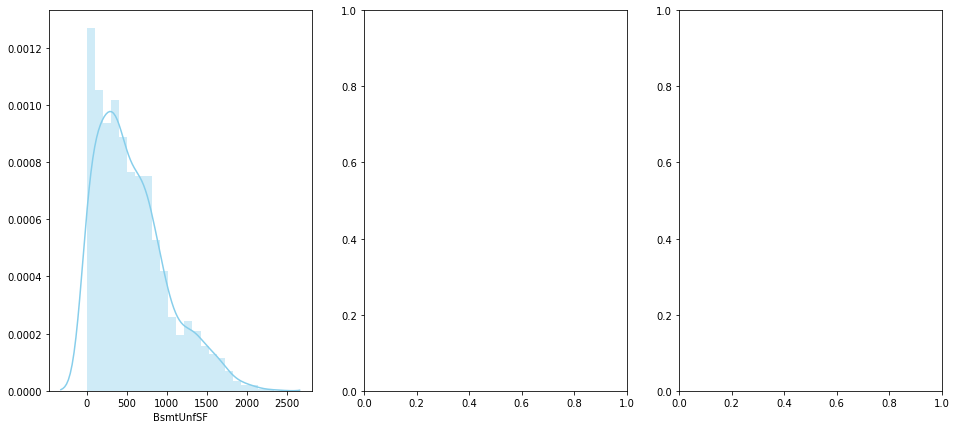

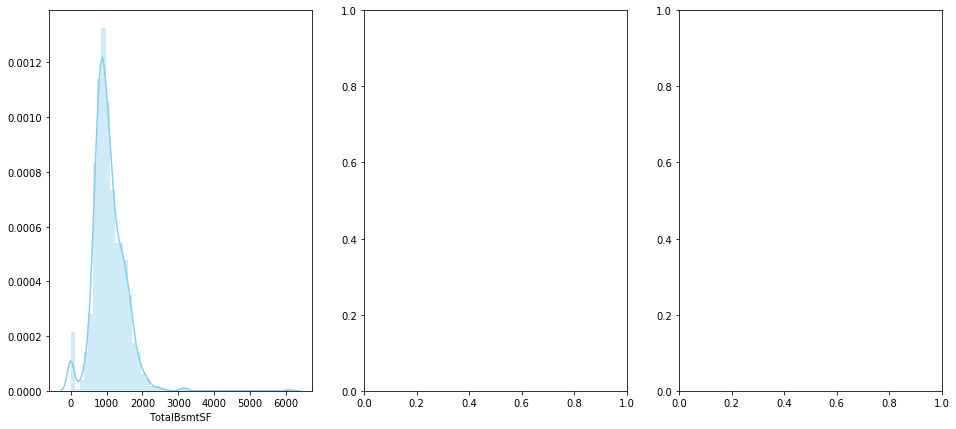

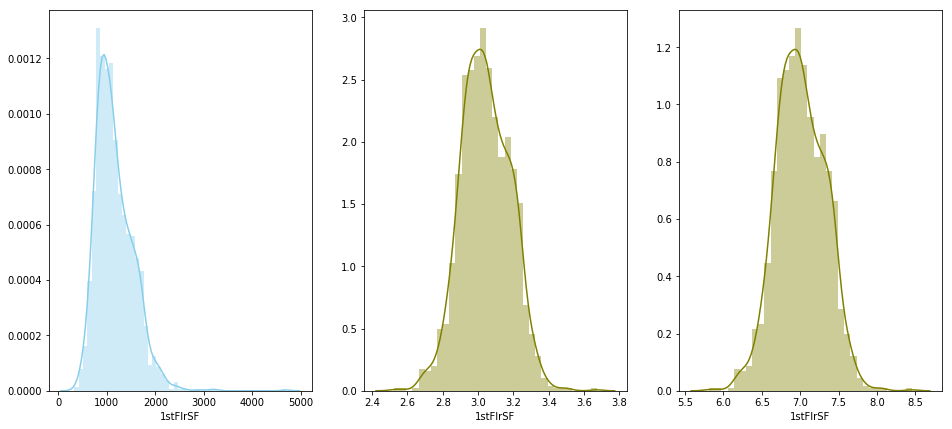

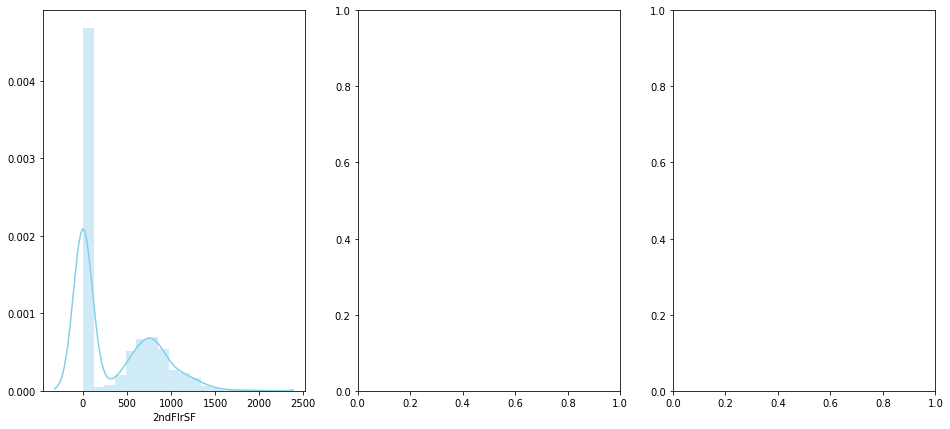

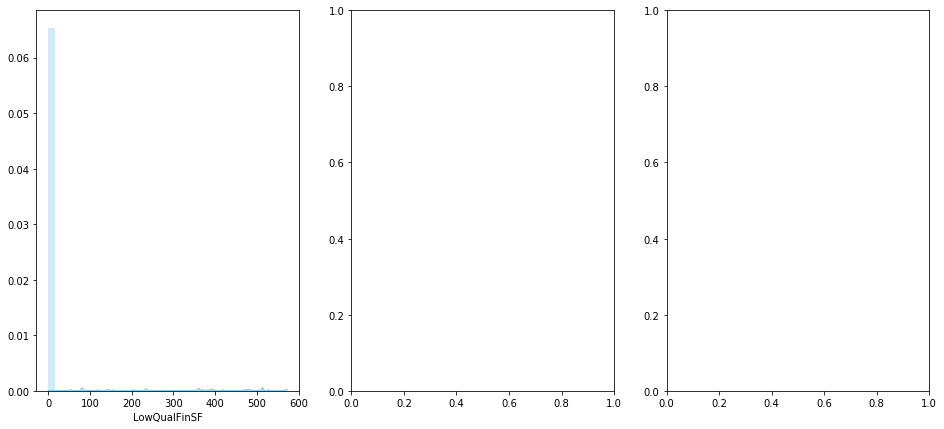

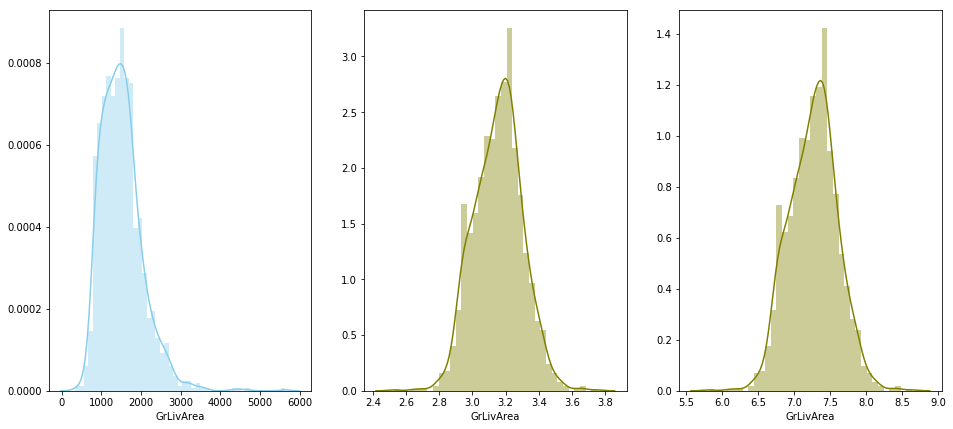

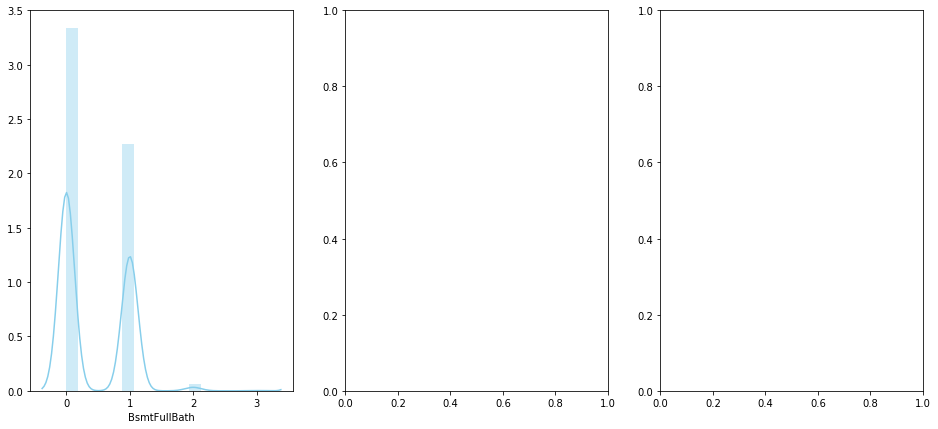

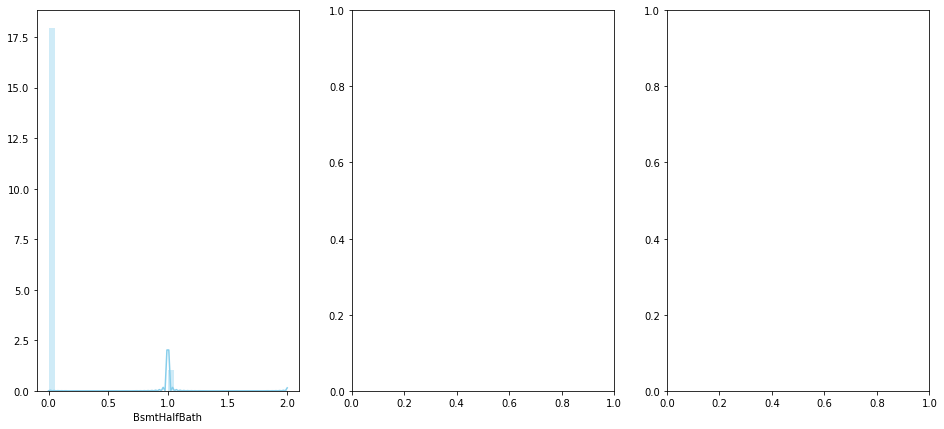

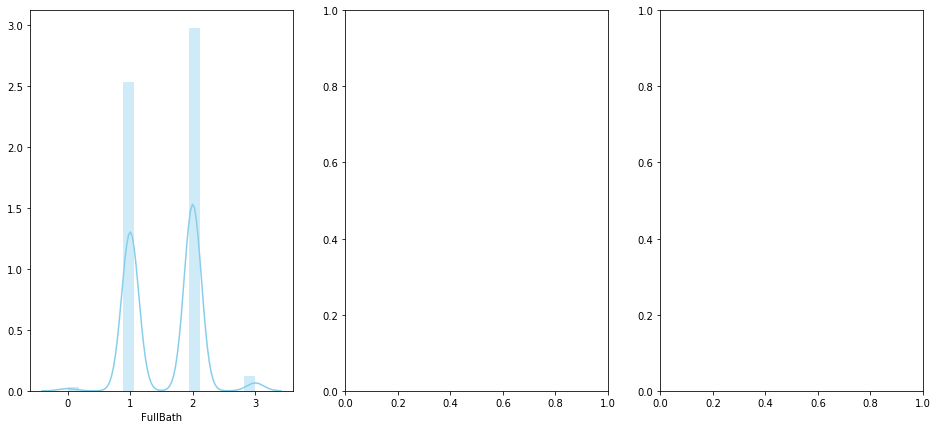

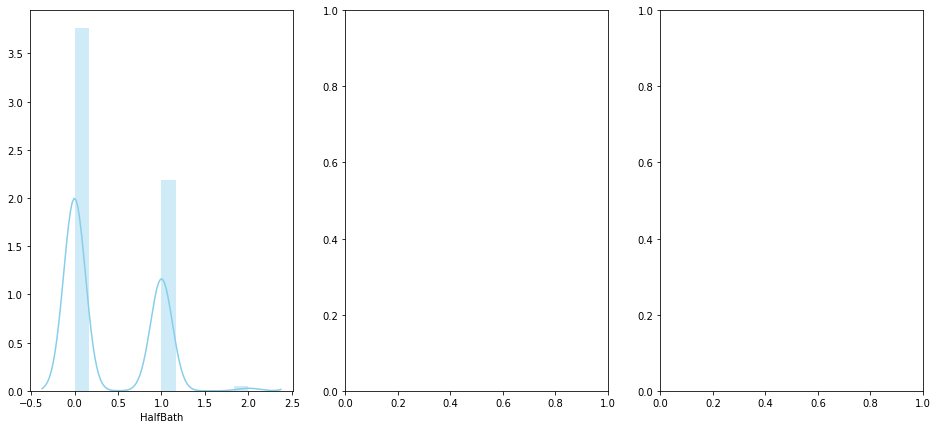

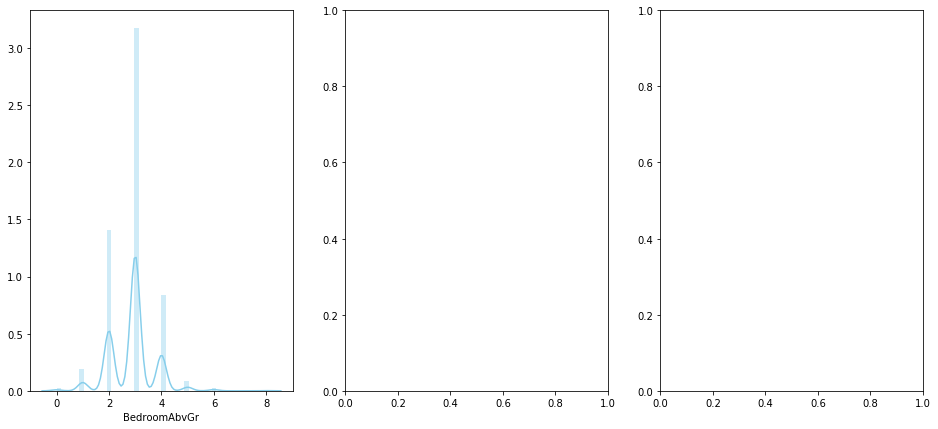

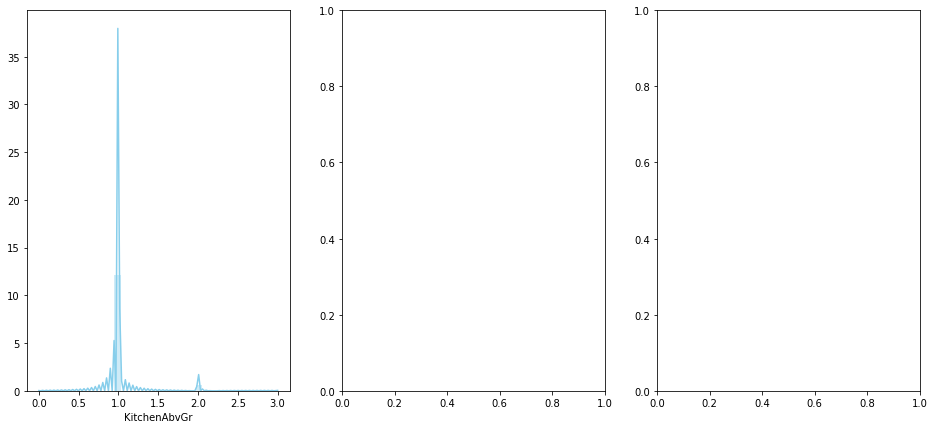

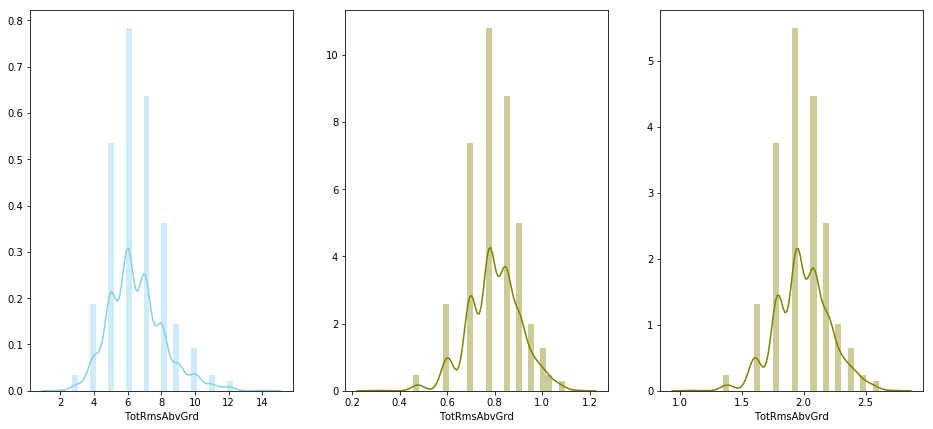

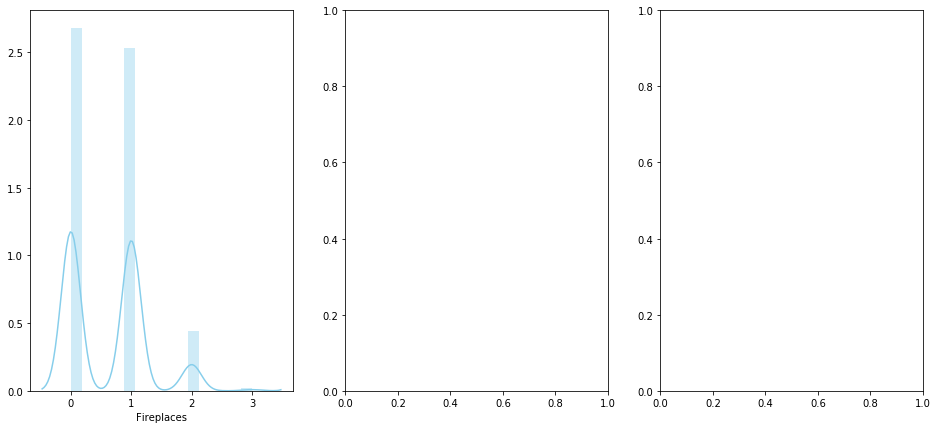

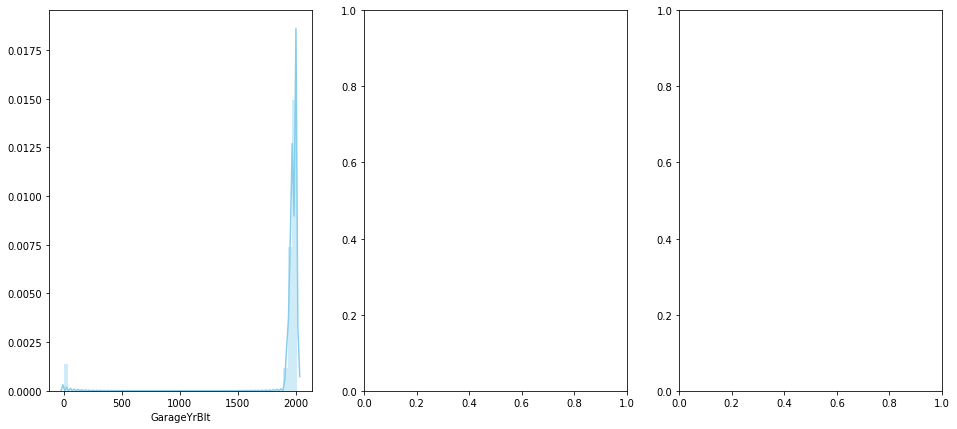

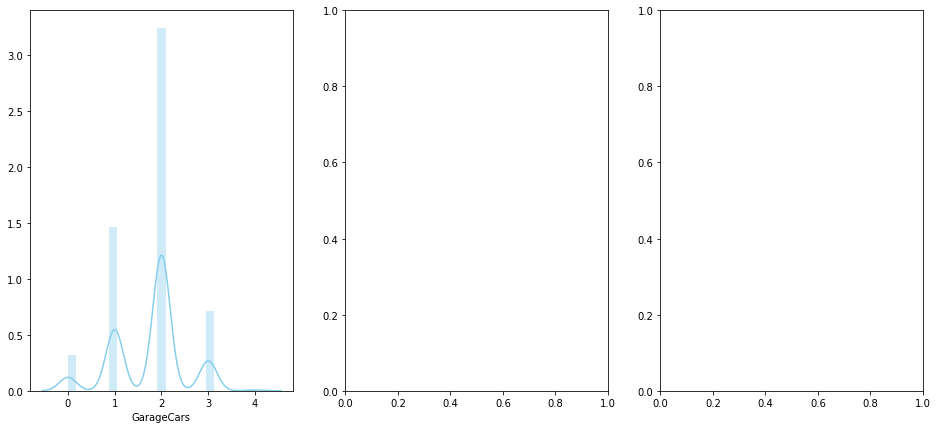

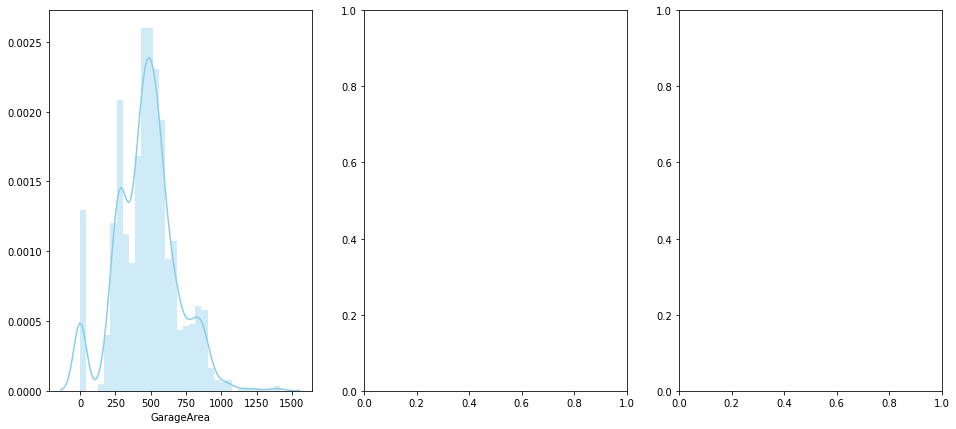

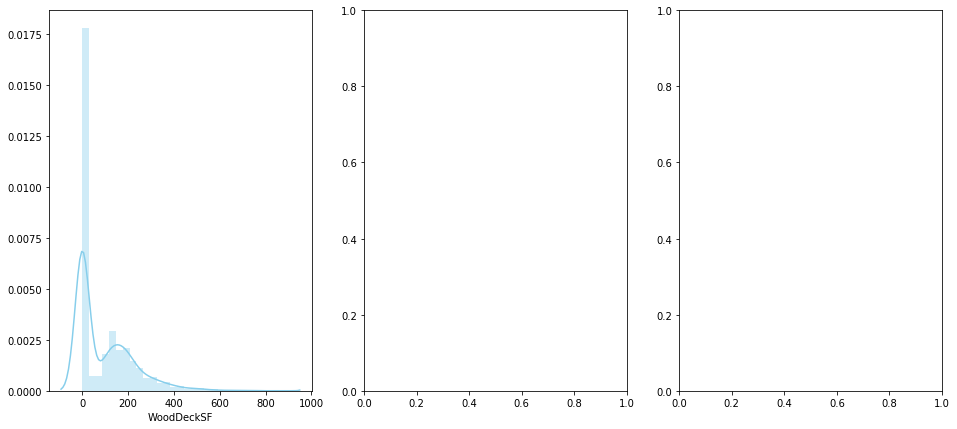

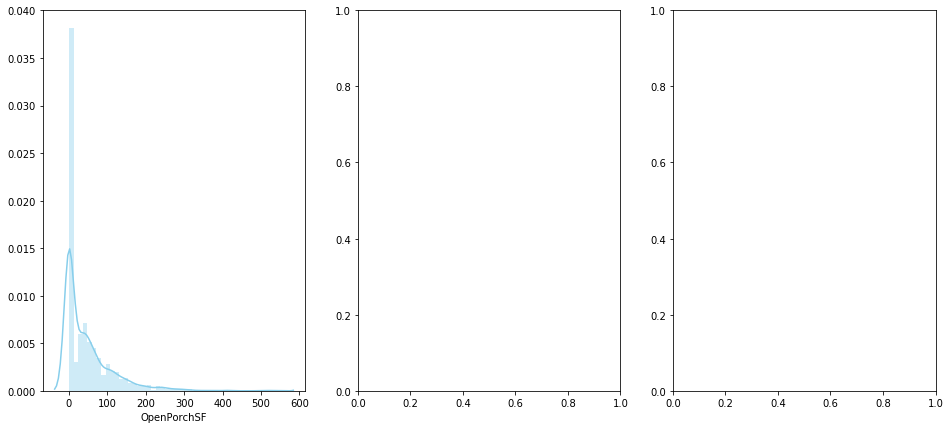

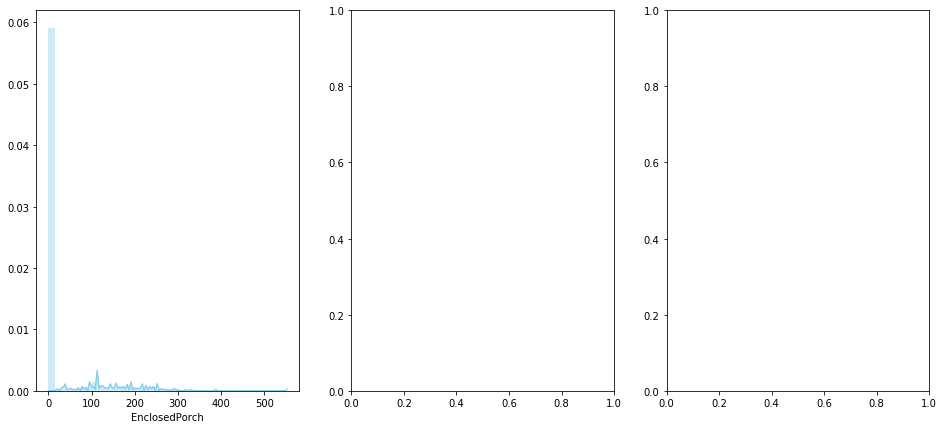

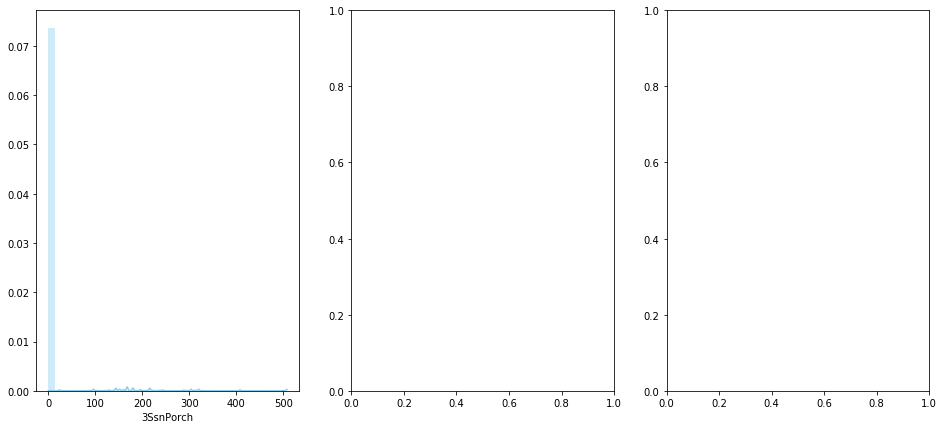

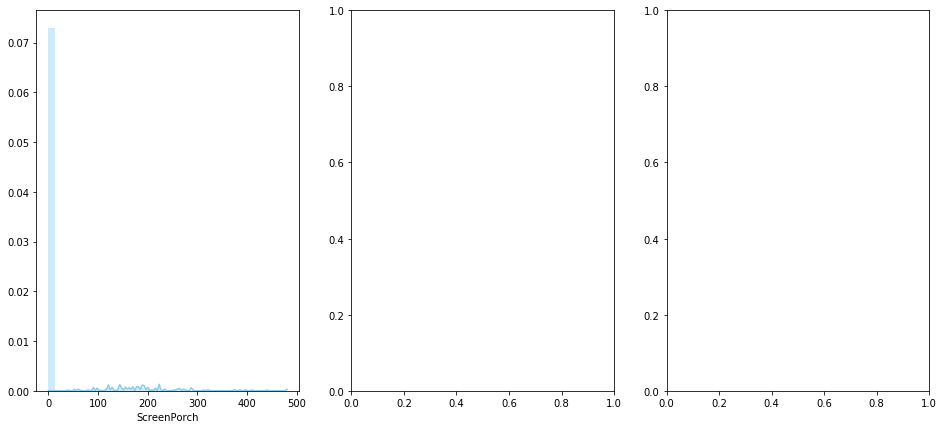

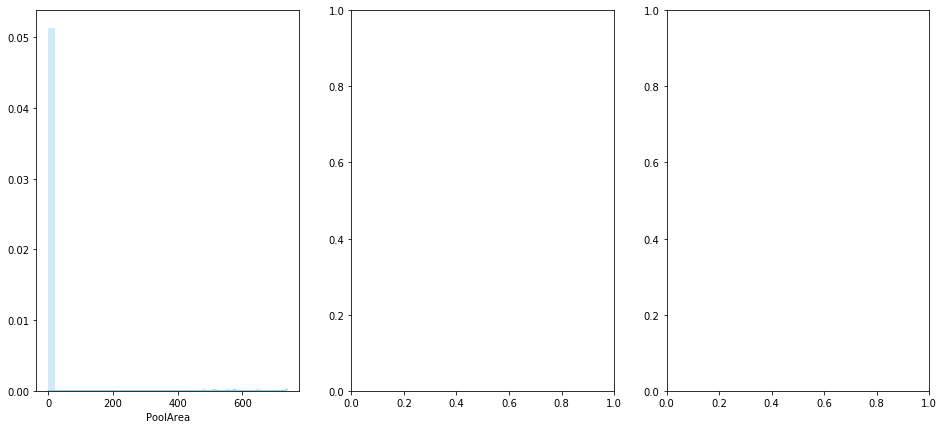

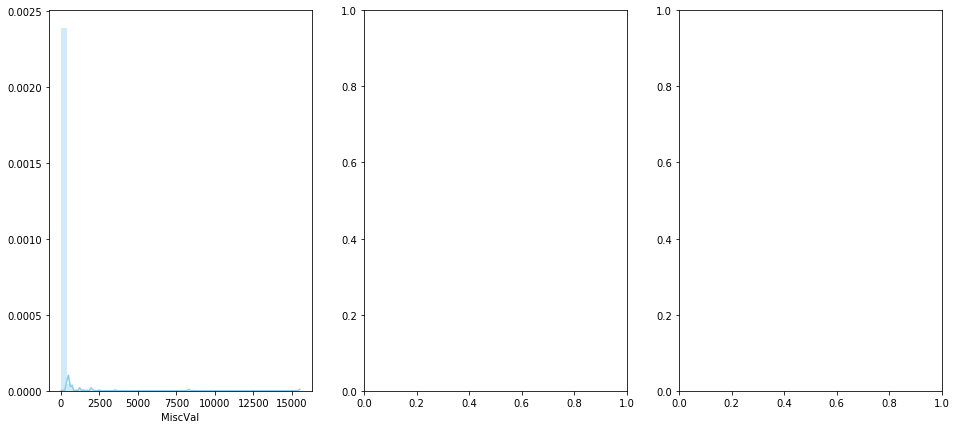

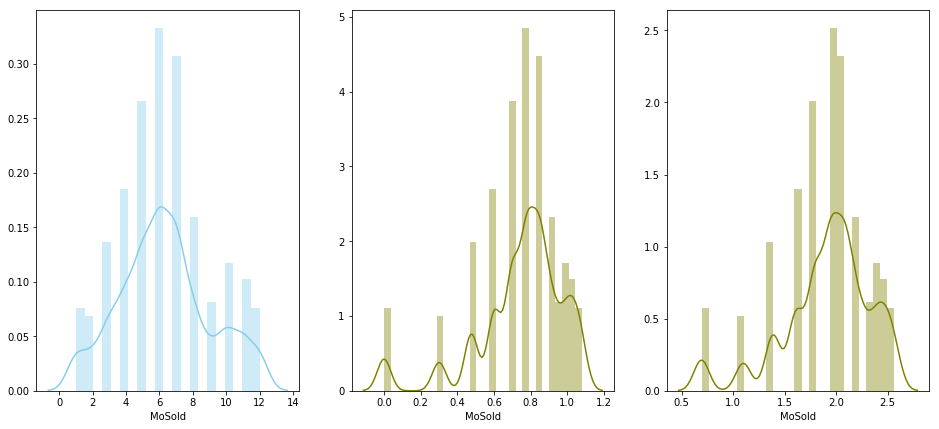

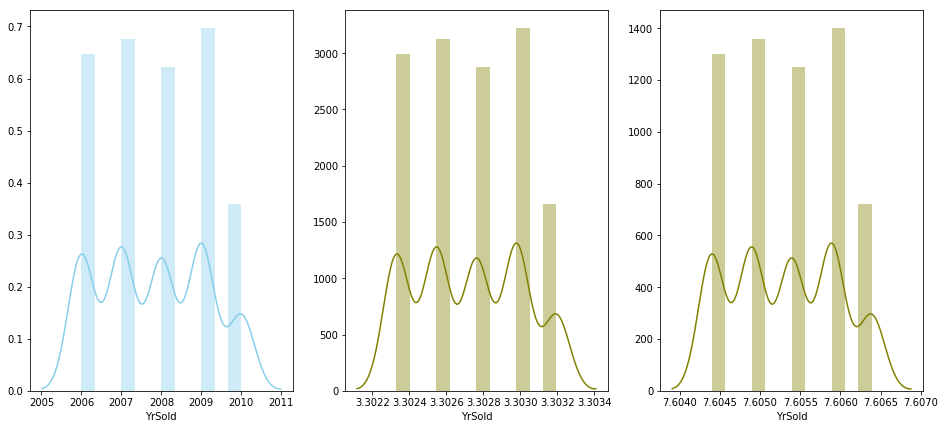

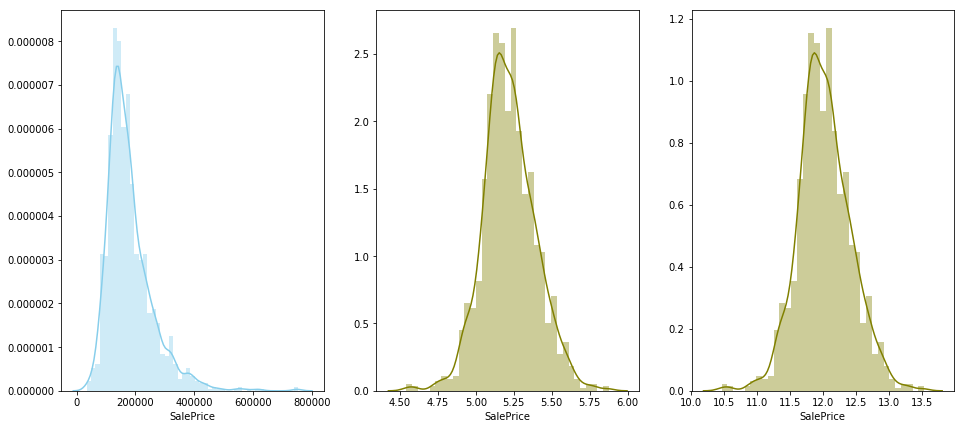

In [67]:
for col in train.columns:
    if all_df[col].dtypes != 'O':
        try:
            plot_n_log10_log101(col)
        except:
            print('cant plot col {}'.format(col))

C:\Users\Rodrigo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rodrigo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log1p
  from ipykernel import kernelapp as app


cant plot col GarageYrBlt


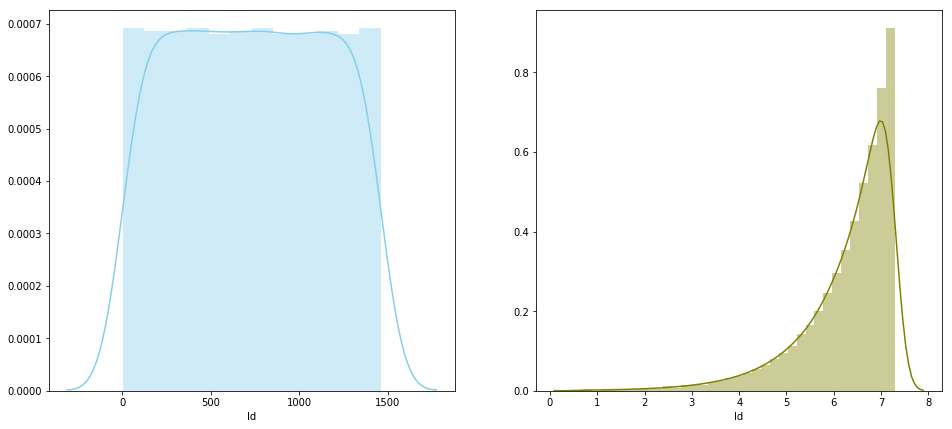

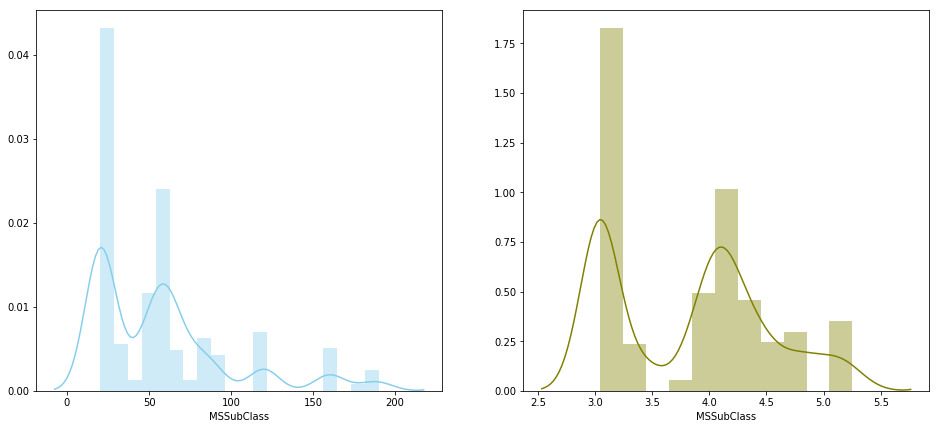

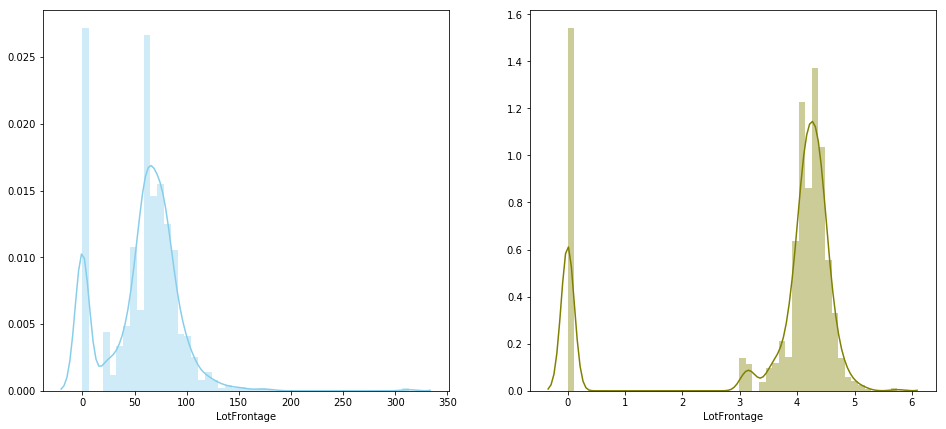

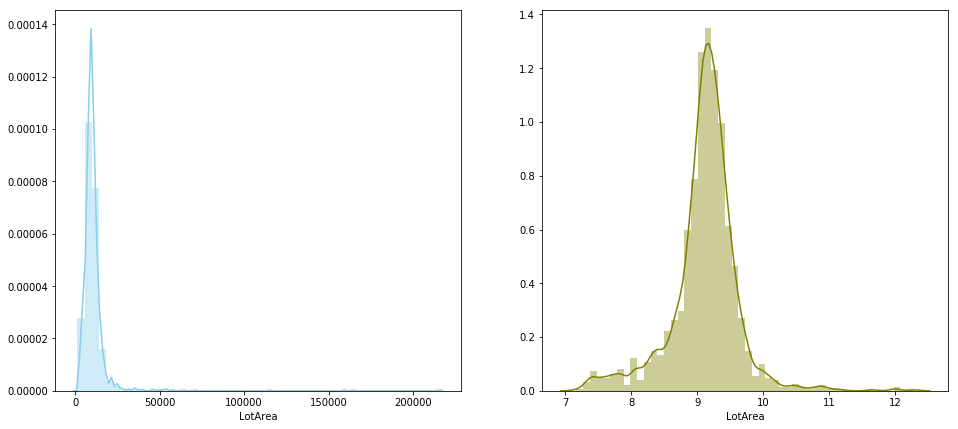

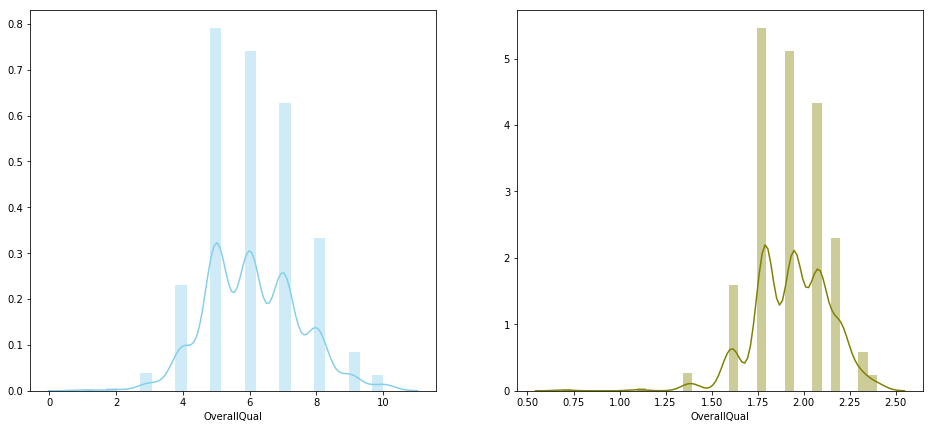

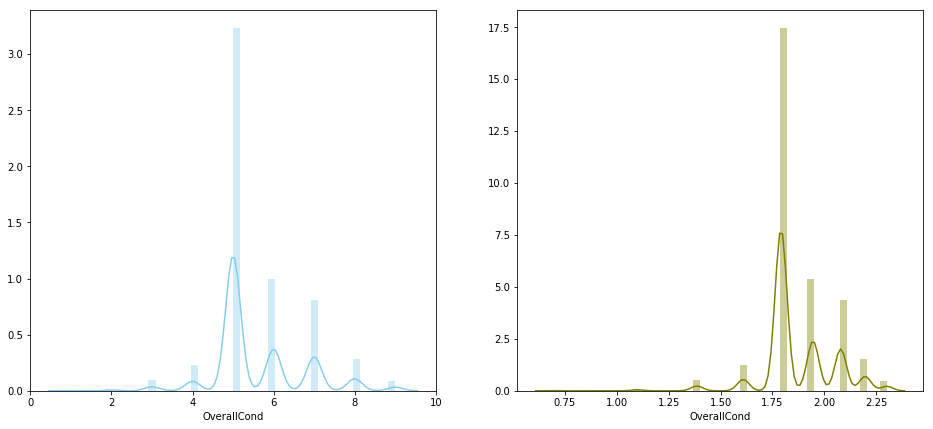

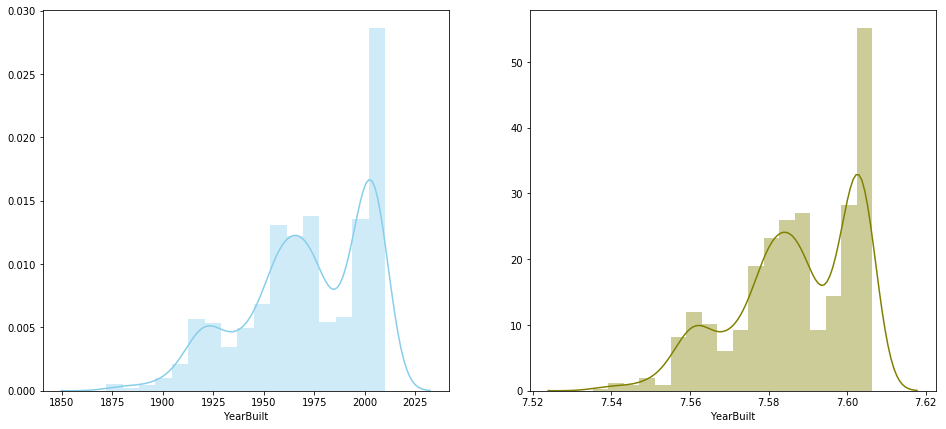

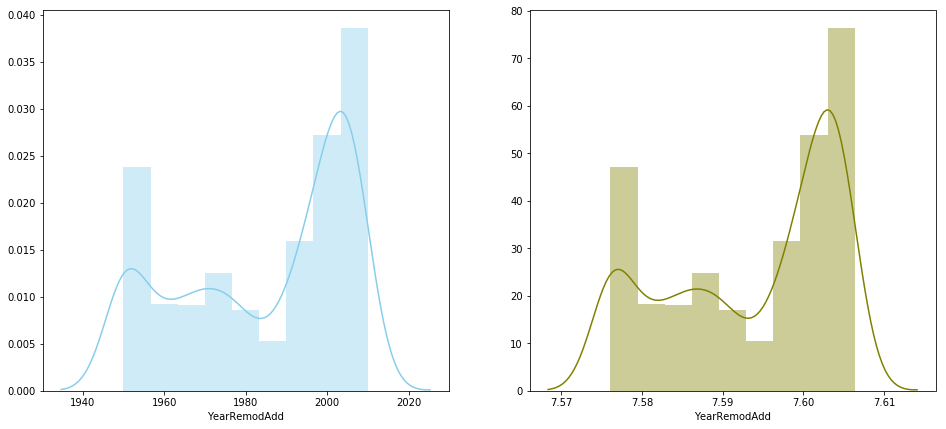

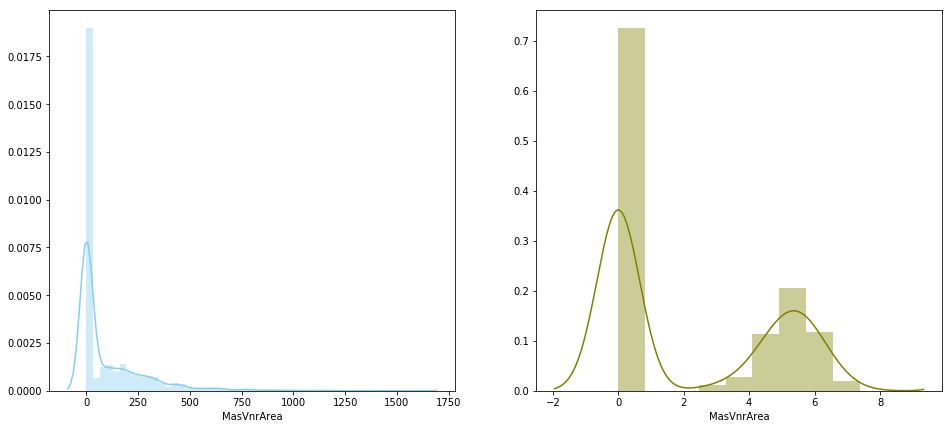

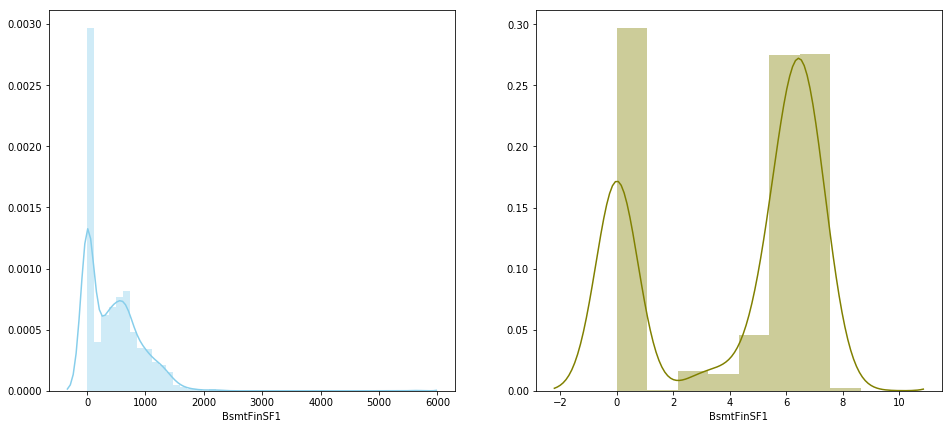

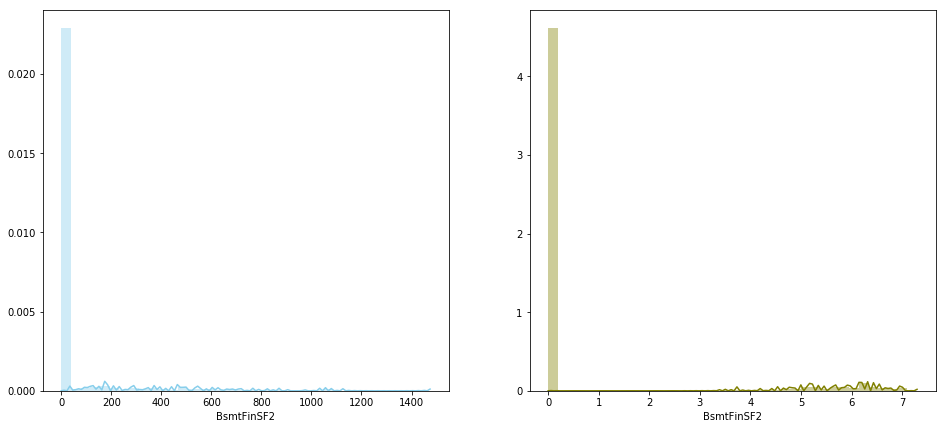

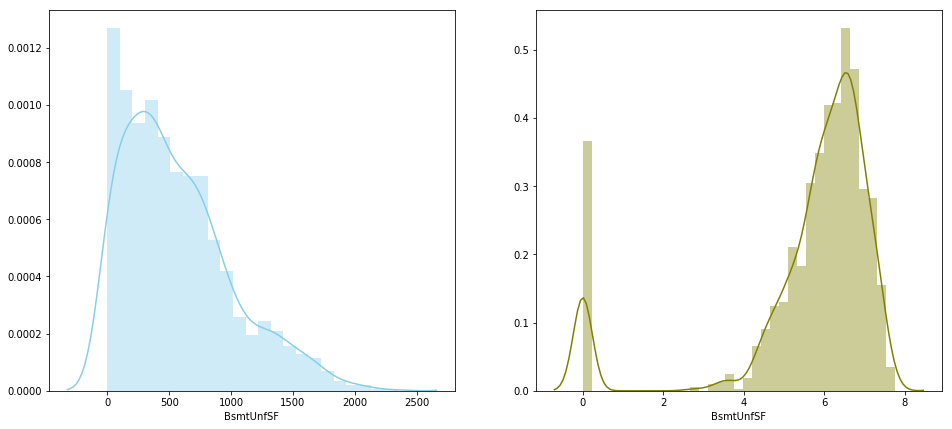

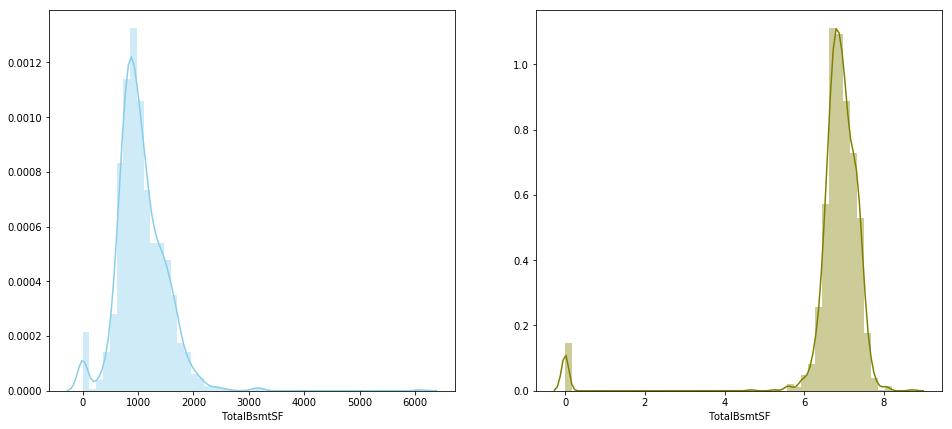

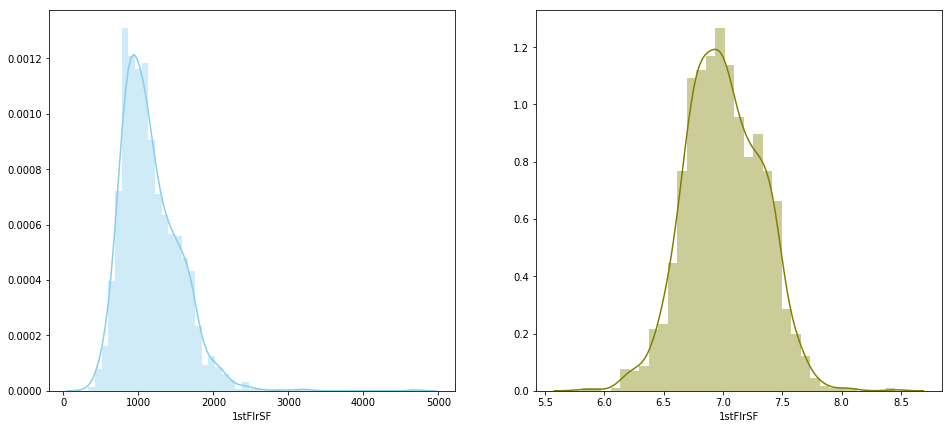

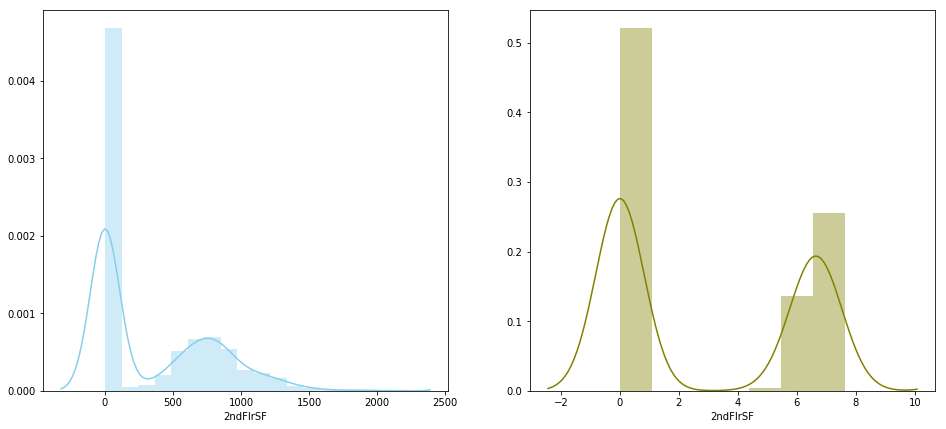

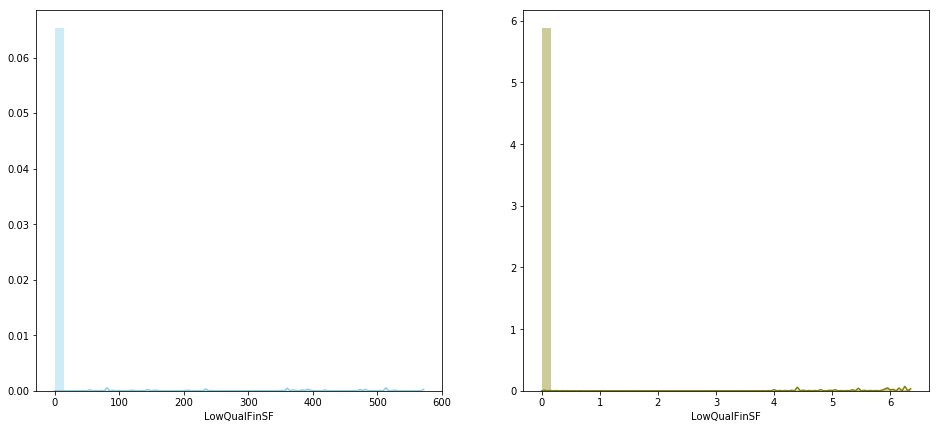

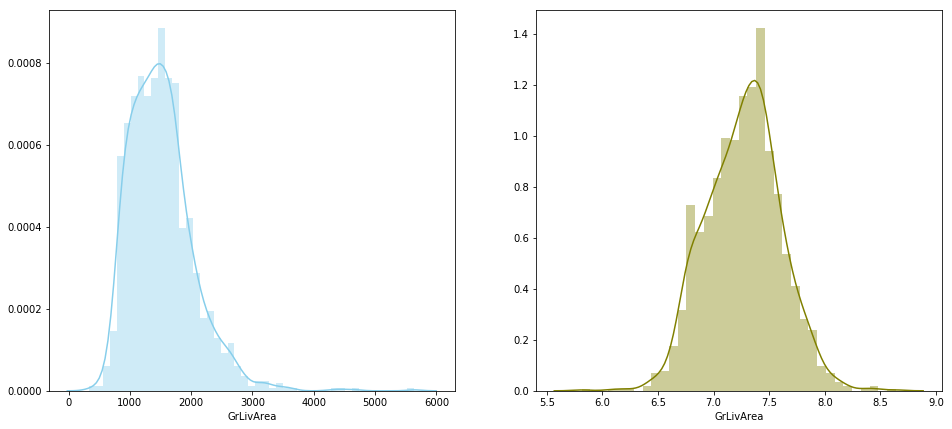

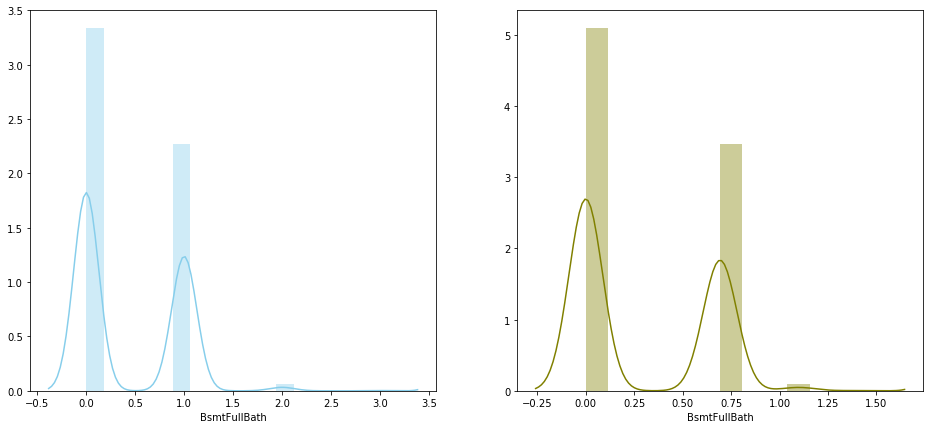

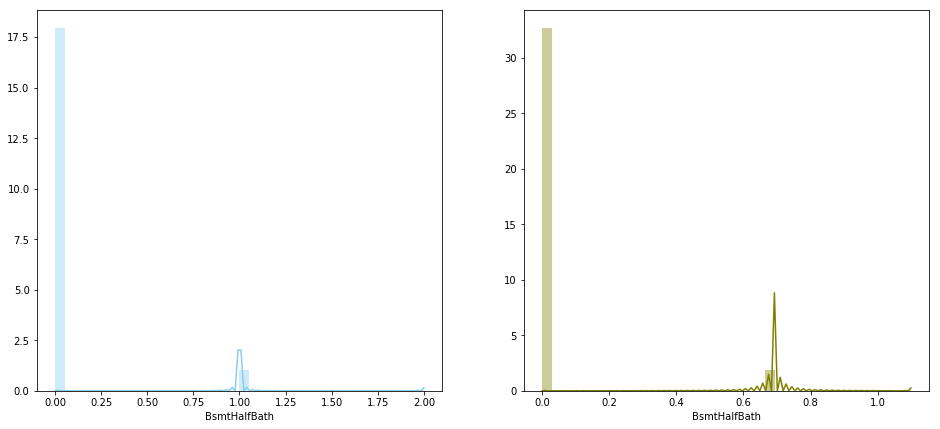

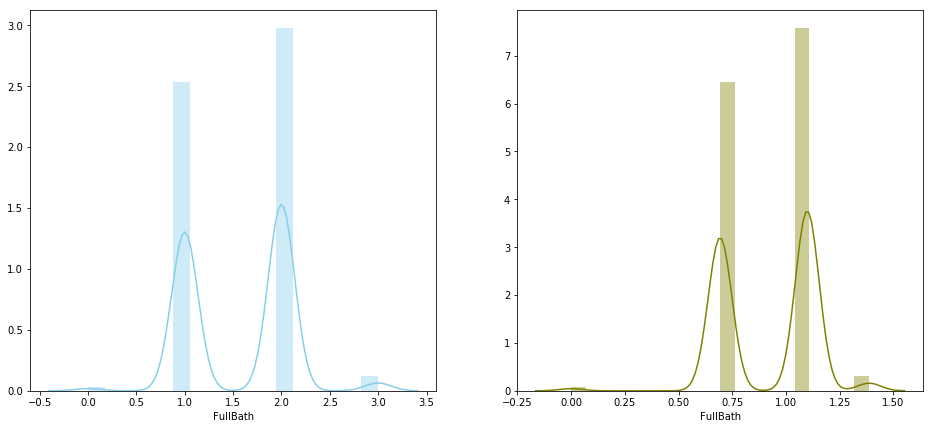

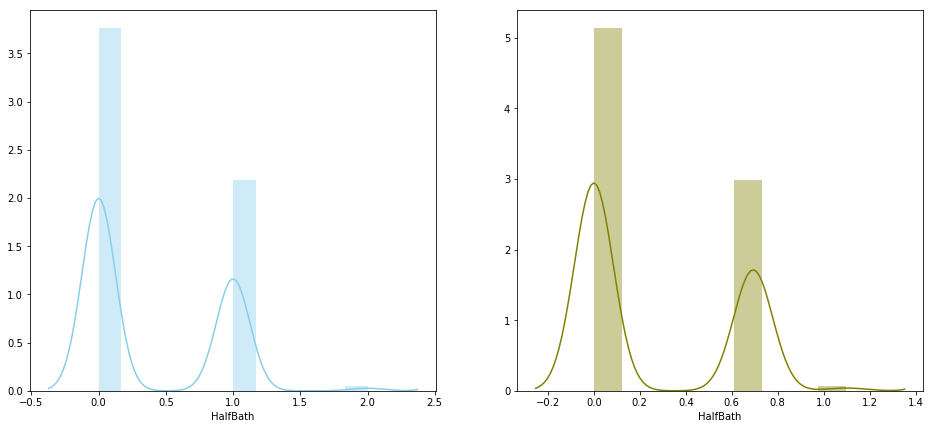

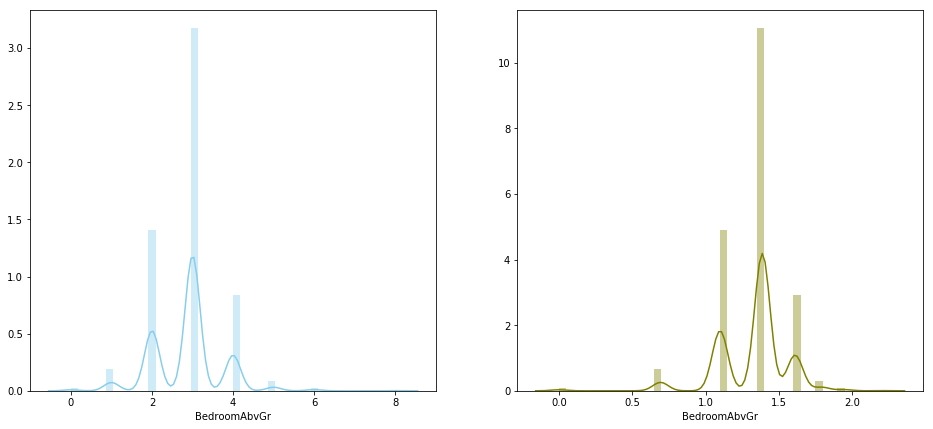

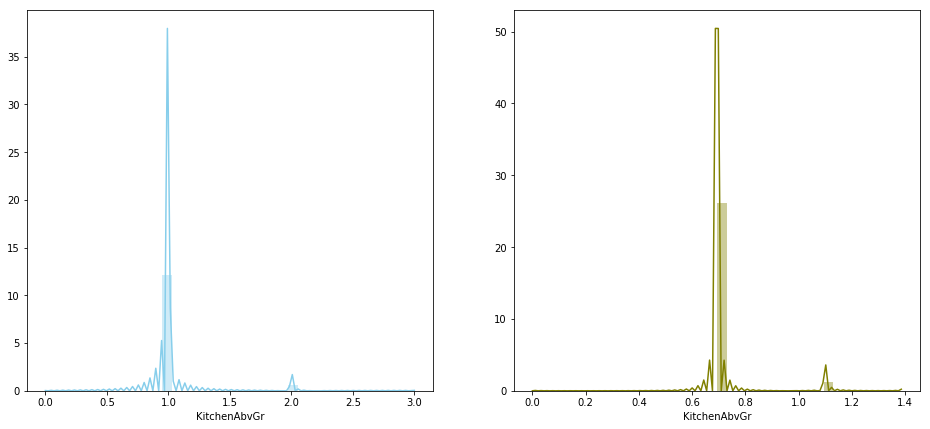

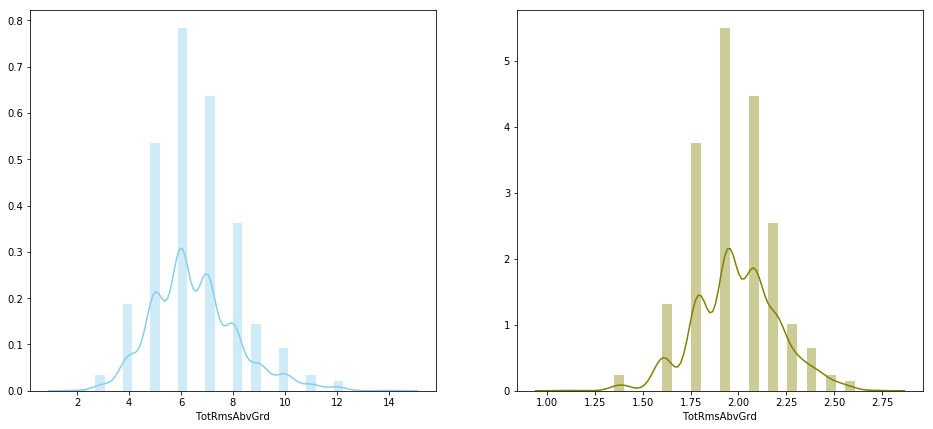

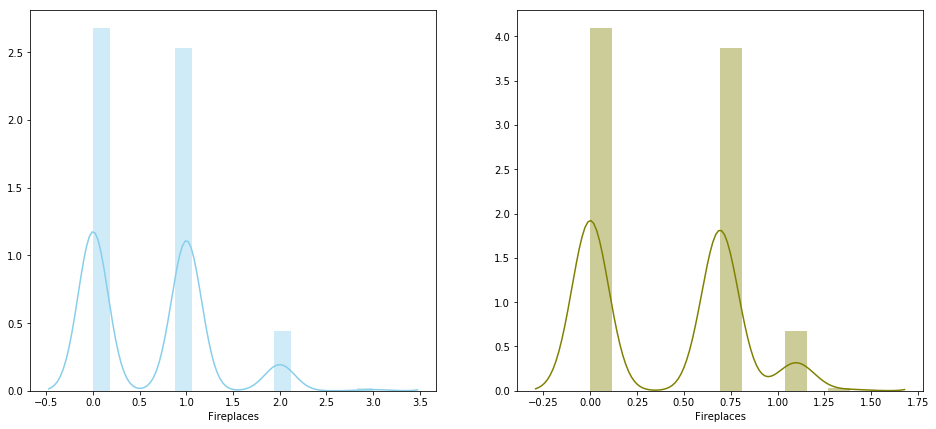

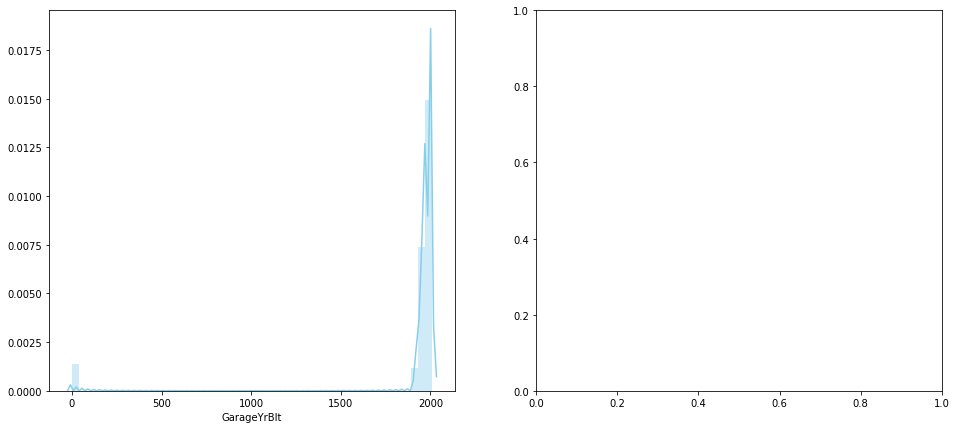

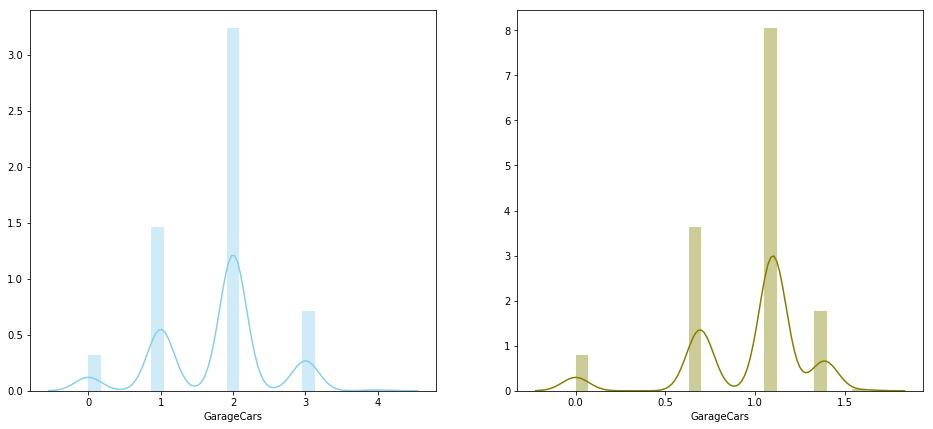

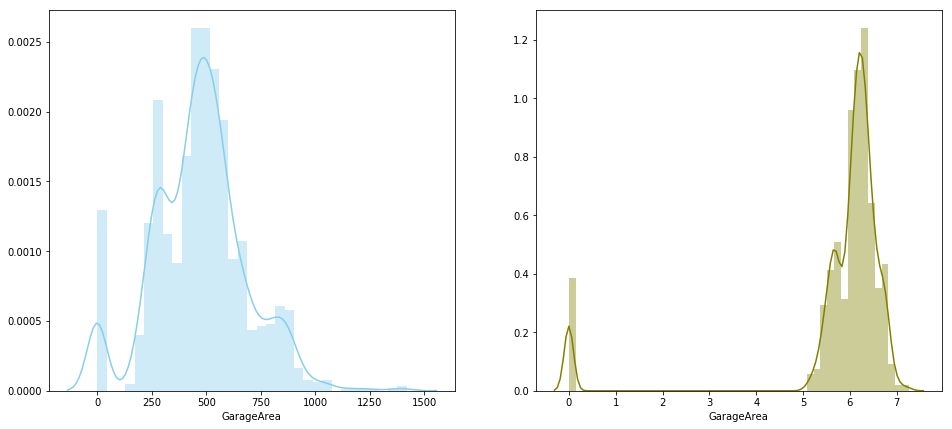

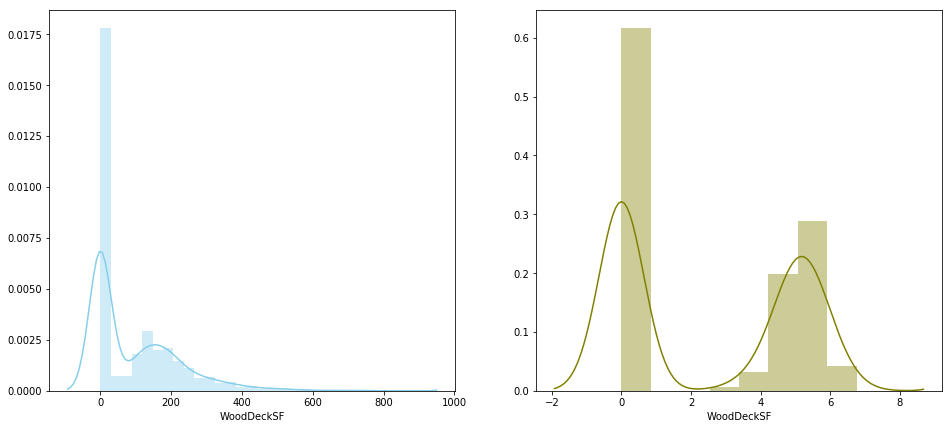

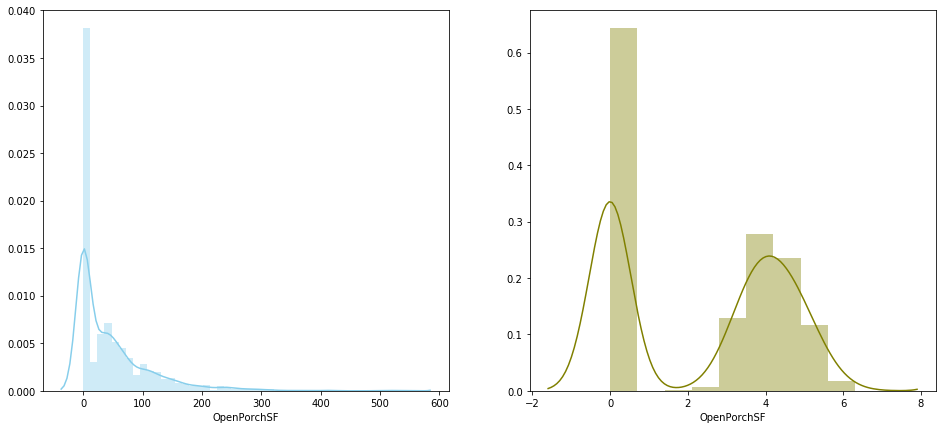

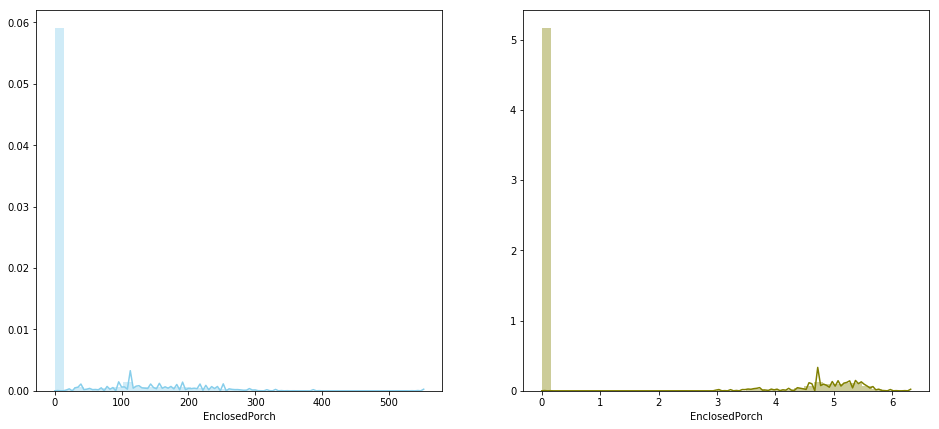

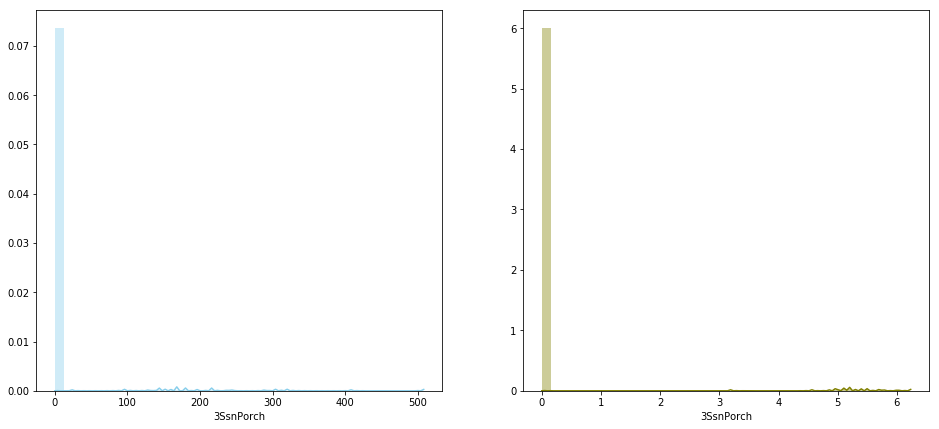

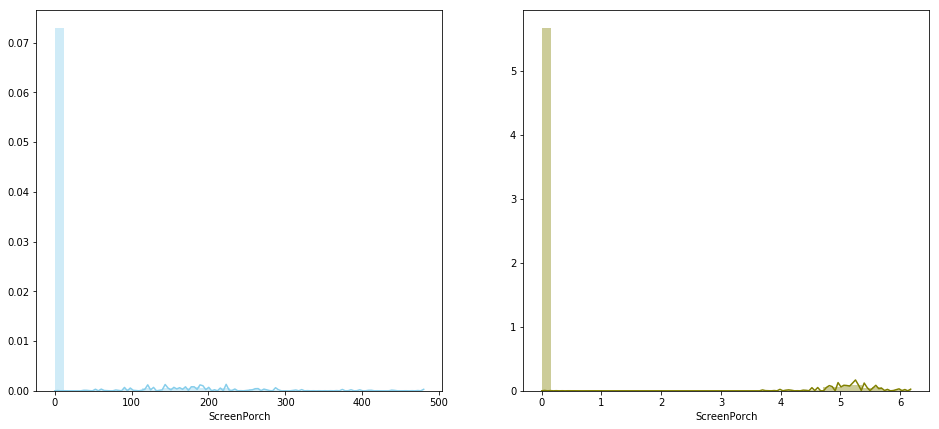

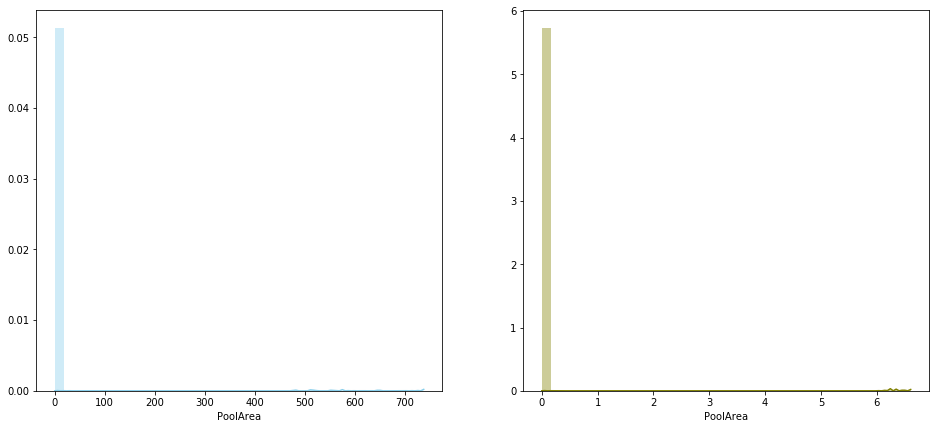

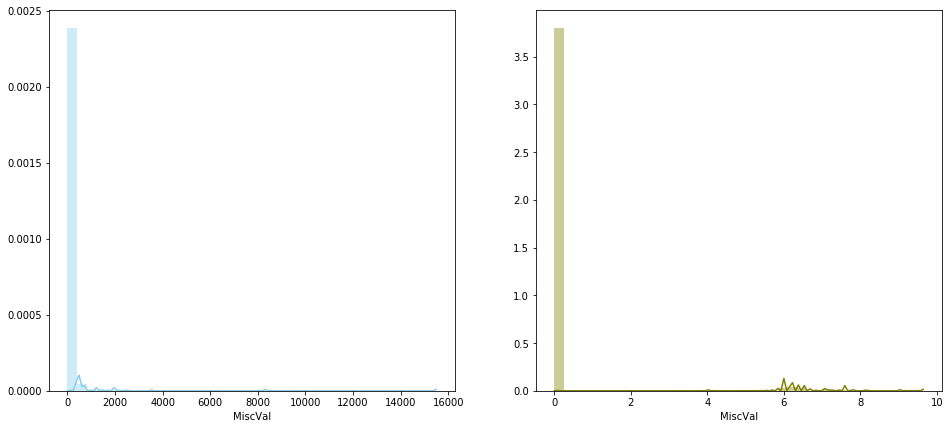

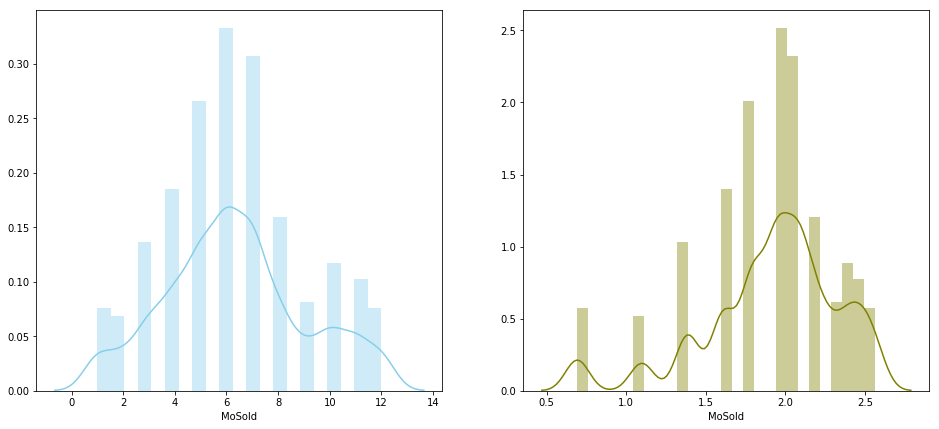

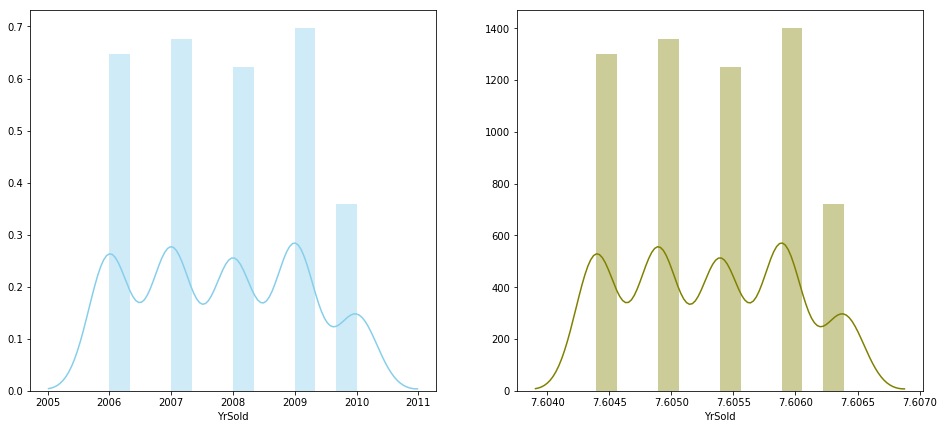

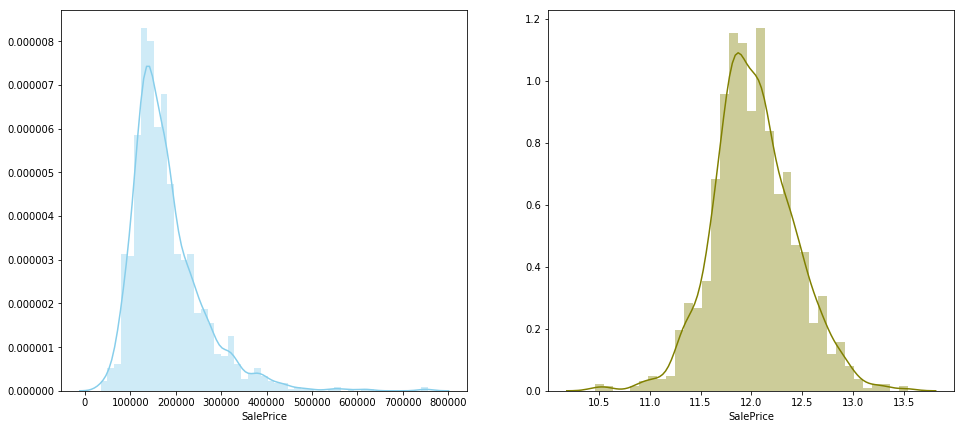

In [69]:
for col in train.columns:
    if all_df[col].dtypes != 'O':
        try:
            plot_n_log1p(col)
        except:
            print('cant plot col {}'.format(col))

In [54]:
cols_to_log1p = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice',
                 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
             'BsmtnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea',
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
             'ScreenPorch', 'PoolArea', 'MiscVal']
cols_to_ss = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
             'BsmtnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea',
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
             'ScreenPorch', 'PoolArea', 'MiscVal']

In [108]:
all_df.shape

(2911, 81)

In [110]:
ss = StandardScaler()
a = ss.fit_transform([all_df['LotFrontage'].values])
# a = ss.fit_transform([all_df[all_df['MasVnrArea'] != 0]['MasVnrArea']])

In [120]:
np.log1p(all_df['LotFrontage'])

0       4.189655
1       4.394449
2       4.234107
3       4.110874
4       4.442651
5       4.454347
6       4.330733
7       0.000000
8       3.951244
9       3.931826
10      4.262680
11      4.454347
12      0.000000
13      4.521789
14      0.000000
15      3.951244
16      0.000000
17      4.290459
18      4.204693
19      4.262680
20      4.624973
21      4.060443
22      4.330733
23      3.806662
24      0.000000
25      4.709530
26      4.110874
27      4.595120
28      3.871201
29      4.110874
          ...   
1429    3.931826
1430    4.330733
1431    4.248495
1432    3.931826
1433    4.110874
1434    3.737670
1435    3.806662
1436    4.248495
1437    4.189655
1438    4.262680
1439    4.948760
1440    0.000000
1441    0.000000
1442    4.564348
1443    4.488636
1444    4.836282
1445    4.369448
1446    3.737670
1447    4.077537
1448    0.000000
1449    3.091042
1450    3.091042
1451    4.394449
1452    3.091042
1453    3.091042
1454    3.091042
1455    3.091042
1456    5.0814

In [53]:
ss = StandardScaler()
for col in cols_to_ss:
    print(col)
    train[col] = ss.fit_transform(train[col])
    test[col] = ss.fit_transform(test[col])

LotFrontage


ValueError: Expected 2D array, got 1D array instead:
array=[65. 80. 68. ... 66. 68. 75.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [56]:
for col in cols_to_log1p:
    train[col] = np.log1p(train[col])
    if col != 'SalePrice':
        test[col] = np.log1p(test[col])

KeyError: 'ManVnrArea'

In [52]:
print(train.iloc[:5,:8])
print(train.iloc[:5,8:16])
print(train.iloc[:5,16:24])
print(train.iloc[:5,24:32])
print(train.iloc[:5,32:40])
print(train.iloc[:5,40:48])
print(train.iloc[:5,48:56])
print(train.iloc[:5,56:64])
print(train.iloc[:5,64:72])
print(train.iloc[:5,72:])

   Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape
0   1          60       RL         65.0  9.042040   Pave  NoAlley      Reg
1   2          20       RL         80.0  9.169623   Pave  NoAlley      Reg
2   3          60       RL         68.0  9.328212   Pave  NoAlley      IR1
3   4          70       RL         60.0  9.164401   Pave  NoAlley      IR1
4   5          60       RL         84.0  9.565284   Pave  NoAlley      IR1
  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType  
0       Norm     1Fam  
1       Norm     1Fam  
2       Norm     1Fam  
3       Norm     1Fam  
4  

In [5]:
cat_col = ['MSSubClass',
          'MSZoning',
          'Street',
          'Alley',
          'LotShape',
          'LandContour',
          'Utilities',
          'LotConfig',
          'LandSlope',
          'Neighborhood',
          'Condition1',
          'Condition2',
          'BldgType',
          'HouseStyle',
          'OverallQual',
          'OverallCond',
          'RoofStyle',
          'RoofMatl',
          'Exterior1st',
          'Exterior2nd',
          'MasVnrType',
          'ExterQual',
          'ExterCond',
          'Foundation',
          'BsmtQual',
          'BsmtCond',
          'BsmtExposure',
          'BsmtFinType1',
          'BsmtFinType2',
          'Heating',
          'HeatingQC',
          'CentralAir',
          'Electrical',
          'KitchenQual',
          'Functional',
          'FireplaceQu',
          'GarageType',
          'GarageFinish',
          'GarageQual',
          'GarageCond',
          'PavedDrive',
          'PoolQC',
          'Fence',
          'MiscFeature',
          'SaleType',
          'SaleCondition']

In [20]:
num_col = list()
for col in train.columns:
    if col not in cat_col and col not in ['Id', 'SalePrice']:
        num_col.append(col)

In [22]:
num_col

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [65]:
ss = StandardScaler()

In [66]:
for col in num_col:
    train[col] = ss.fit_transform(train[col])
    test[col] = ss.fit_transform(test[col])

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

In [68]:
train.to_csv('data/pro_train.csv', sep = ',', index = False)
test.to_csv('data/pro_test.csv', sep = ',', index = False)